In [ ]:
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [ ]:
def fix_legend(ax):
    leg = ax.legend_
    for t in leg.texts:
        t.set_text(t.get_text()[:5])

def explode(df, col, val):
    df[col] = [val] * len(df)
    return df.explode(col)

def draw_method_results(task, dataset):
    pickles = glob(f'results/{task}_{dataset}*')
    model = 'gcn' if task is 'nodeclass' else 'vgae'
    priv_pkl = pickles.pop(pickles.index(f'results/{task}_{dataset}_{model}_priv.pkl'))
    df_priv = pd.read_pickle(priv_pkl)
    df_results = df_priv[(df_priv['pnr'] == 1) & (df_priv['pfr'] == 1)]
    eps_list = df_results['eps'].unique()
    
    for file in pickles:
        df = pd.read_pickle(file)
        df = explode(df, 'eps', eps_list)
        df_results = df_results.append(df, ignore_index=True)
        
    df_results['method'] = df_results['method'].apply(lambda x: x.replace('+void', ''))
    ax = sns.lineplot(data=df_results, x='eps', y='perf', hue='method', ci='sd', 
                      markers=True, style='method', dashes=False)
    ax.set_ylabel('acc')
    ax.set_title(dataset)
    return ax

def draw_pr_results(task, dataset, x='pnr'):
    eps_list = [1,3,5]
    model = 'gcn' if task is 'nodeclass' else 'vgae'
    df_priv = pd.read_pickle(f'results/{task}_{dataset}_{model}_priv.pkl')
    if x == 'pnr':
        df_priv = df_priv[df_priv['pfr'] == 1]
    elif x == 'pfr':
        df_priv = df_priv[df_priv['pnr'] == 1]
    df_raw = pd.read_pickle(f'results/{task}_{dataset}_{model}_raw.pkl')
    df_raw = explode(df_raw, 'eps', eps_list)
    df = df_priv.append(df_raw, ignore_index=True)
    ax = sns.lineplot(data=df, x=x, y='perf', hue='eps', hue_order=eps_list, ci='sd',
                     markers=True, style='eps', style_order=eps_list, 
                      dashes=False, legend=False)
    ax.legend(labels=eps_list, title='eps')
    ax.set_title(dataset)
    return ax

def draw_error_results(dataset, x='deg', hue='eps', **kwargs):
    df = pd.read_pickle(f'results/errorest_{dataset}_gcn_priv.pkl')
    if x == 'deg': 
        df = df[(df['pnr'] == 1) & (df['pfr'] == 1)]
    elif x == 'pnr':
        df = df[df['pfr'] == 1]
    elif x == 'pfr':
        df = df[df['pnr'] == 1]
    eps_list = df['eps'].unique()
    if hue == 'eps':
        df['eps'] = df['eps'].apply(lambda x: f'ε={x}')
    df = df.explode('perf')
    df[['err','deg']] = pd.DataFrame(df['perf'].tolist(),index=df.index)
    ax = sns.lineplot(data=df, x=x, y='err', hue=hue, ci='sd', legend=False, **kwargs)
    ax.set_title(dataset)
    if hue: ax.legend(labels=eps_list, title='eps')
    return ax

# Node Classification

## Comparison of different methods

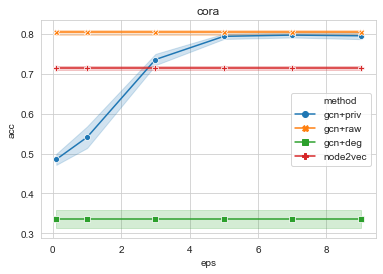

In [36]:
draw_method_results(task='nodeclass', dataset='cora')

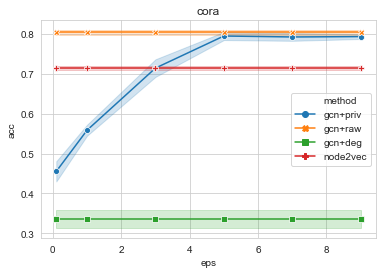

In [85]:
draw_method_results(task='nodeclass', dataset='cora')

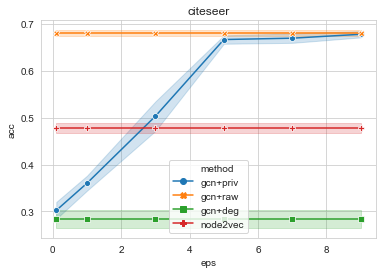

In [37]:
draw_method_results(task='nodeclass', dataset='citeseer')

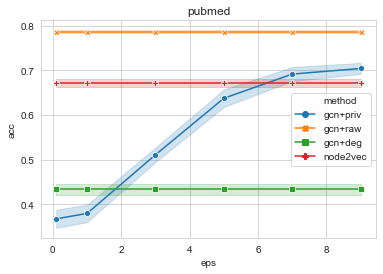

In [38]:
draw_method_results(task='nodeclass', dataset='pubmed')

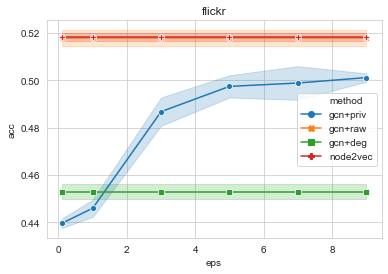

In [39]:
draw_method_results(task='nodeclass', dataset='flickr')

## Effect of private node ratios

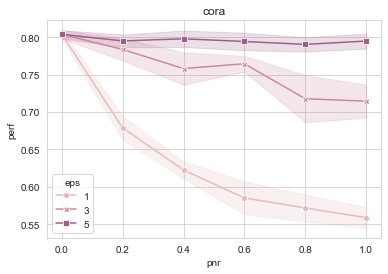

In [84]:
draw_pr_results('nodeclass', 'cora', 'pnr')

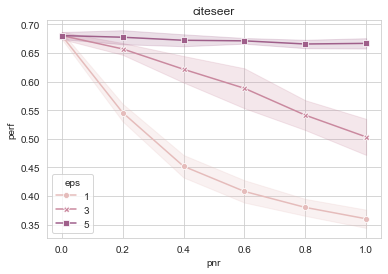

In [250]:
draw_pr_results('nodeclass', 'citeseer', 'pnr')

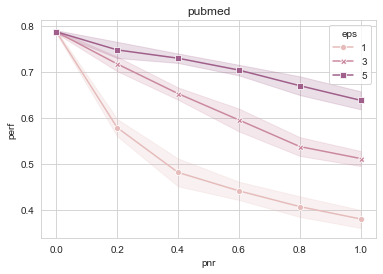

In [251]:
draw_pr_results('nodeclass', 'pubmed', 'pnr')

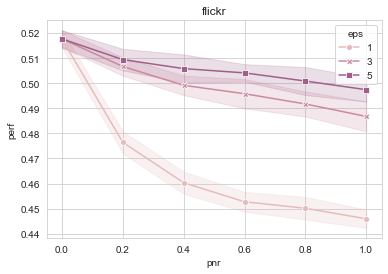

In [13]:
draw_pr_results('nodeclass', 'flickr', 'pnr')

## Effect of private feature ratios

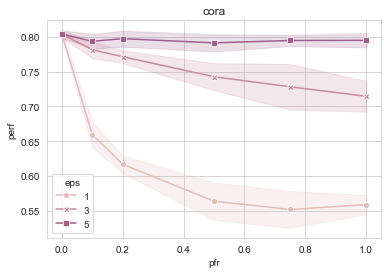

In [83]:
draw_pr_results('nodeclass', 'cora', 'pfr')

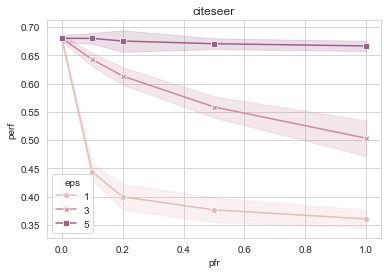

In [247]:
draw_pr_results('nodeclass', 'citeseer', 'pfr')

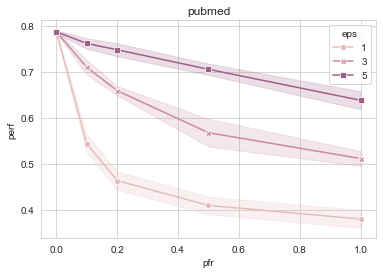

In [248]:
draw_pr_results('nodeclass', 'pubmed', 'pfr')

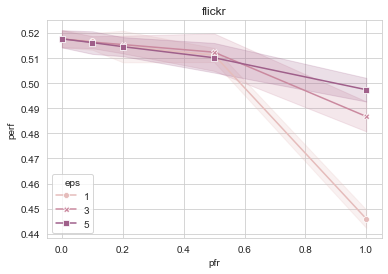

In [14]:
draw_pr_results('nodeclass', 'flickr', 'pfr')

# Link Prediction

## Comparison of different methods

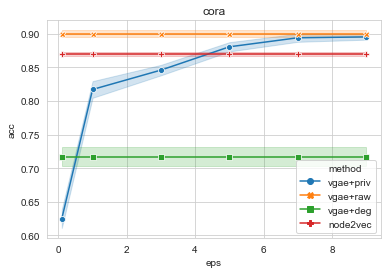

In [61]:
draw_method_results(task='linkpred', dataset='cora')

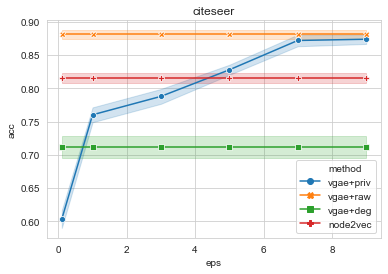

In [62]:
draw_method_results(task='linkpred', dataset='citeseer')

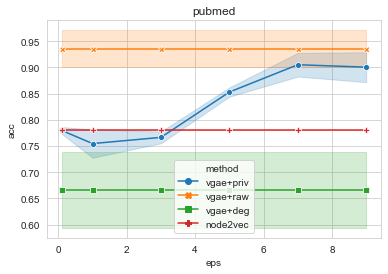

In [90]:
draw_method_results(task='linkpred', dataset='pubmed')

In [ ]:
draw_method_results(task='linkpred', dataset='flickr')

## Comparison of private node ratios

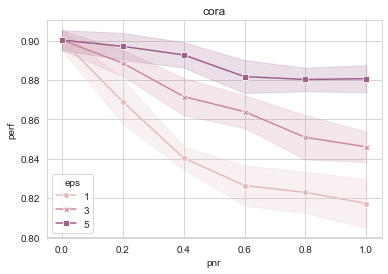

In [25]:
draw_pr_results('linkpred', 'cora', 'pnr')

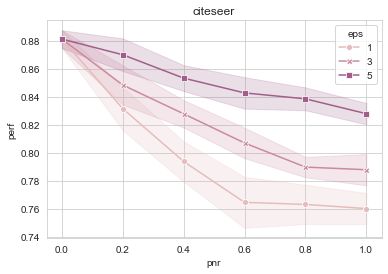

In [28]:
draw_pr_results('linkpred', 'citeseer', 'pnr')

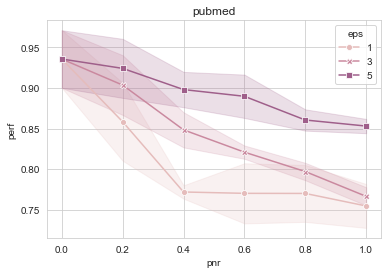

In [91]:
draw_pr_results('linkpred', 'pubmed', 'pnr')

In [ ]:
draw_pr_results('linkpred', 'flickr')

## Comparison of private feature ratios

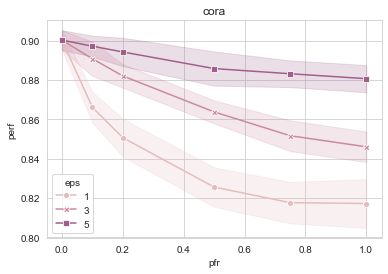

In [26]:
draw_pr_results('linkpred', 'cora', 'pfr')

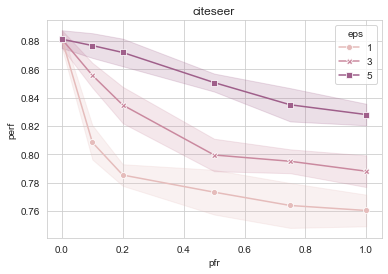

In [29]:
draw_pr_results('linkpred', 'citeseer', 'pfr')

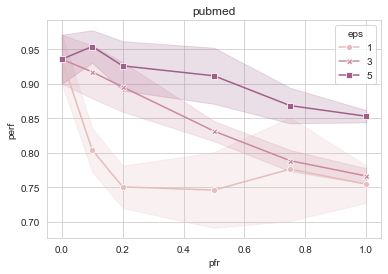

In [92]:
draw_pr_results('linkpred', 'pubmed', 'pfr')

In [ ]:
draw_pr_results('linkpred', 'flickr')

# Error Estimation

## Effect of node degree

(0, 50)

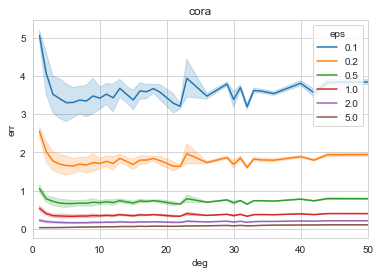

In [87]:
ax = draw_error_results('cora')
ax.set_xlim(0, 50)

(0, 30)

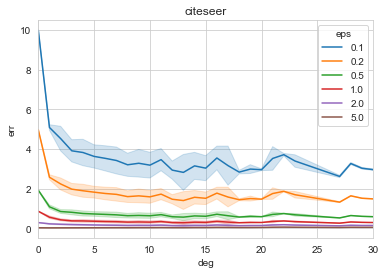

In [209]:
ax = draw_error_results('citeseer')
ax.set_xlim(0, 30)

(0, 50)

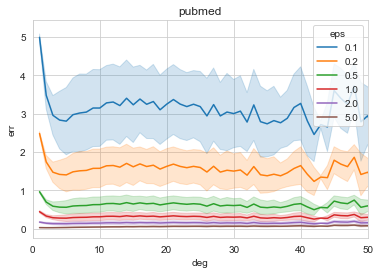

In [210]:
ax = draw_error_results('pubmed')
ax.set_xlim(0, 50)

(0, 500)

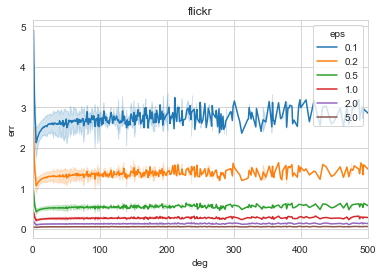

In [107]:
ax = draw_error_results('flickr')
ax.set_xlim(0, 500)

In [ ]:
ax = draw_error_results('amazon-photo')
# ax.set_xlim(0, 500)

## Effect of epsilon

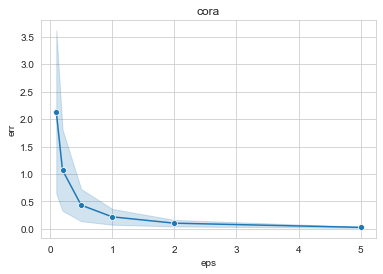

In [88]:
ax = draw_error_results('cora', x='eps', hue=None, marker='o')

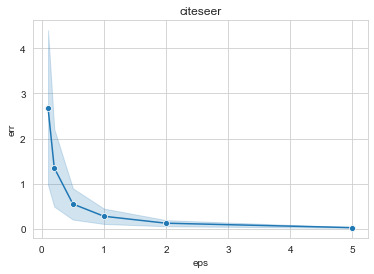

In [69]:
ax = draw_error_results('citeseer', x='eps', hue=None, marker='o')

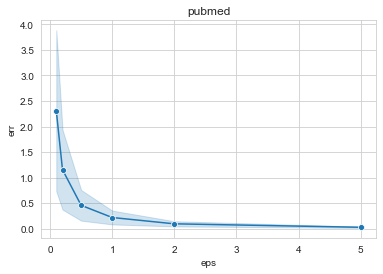

In [70]:
ax = draw_error_results('pubmed', x='eps', hue=None, marker='o')

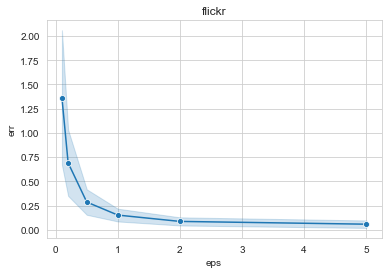

In [71]:
ax = draw_error_results('flickr', x='eps', hue=None, marker='o')

## Effect of private feature ratios

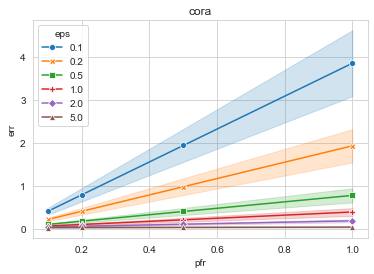

In [75]:
draw_error_results('cora', x='pfr', hue='eps', markers=True, style='eps', dashes=False)

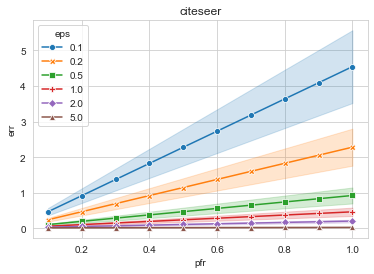

In [76]:
draw_error_results('citeseer', x='pfr', hue='eps', markers=True, style='eps', dashes=False)

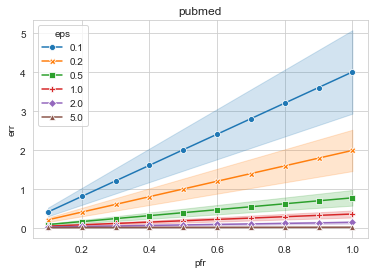

In [77]:
draw_error_results('pubmed', x='pfr', hue='eps', markers=True, style='eps', dashes=False)

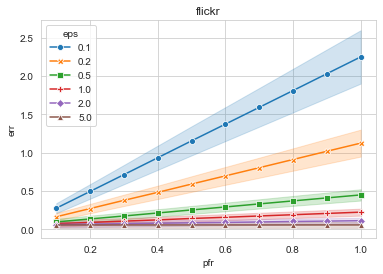

In [78]:
draw_error_results('flickr', x='pfr', hue='eps', markers=True, style='eps', dashes=False)

## Effect of private node ratios

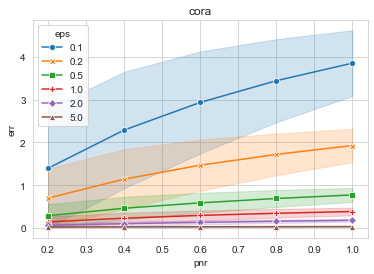

In [79]:
draw_error_results('cora', x='pnr', hue='eps', markers=True, style='eps', dashes=False)

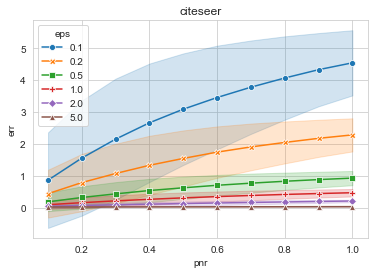

In [80]:
draw_error_results('citeseer', x='pnr', hue='eps', markers=True, style='eps', dashes=False)

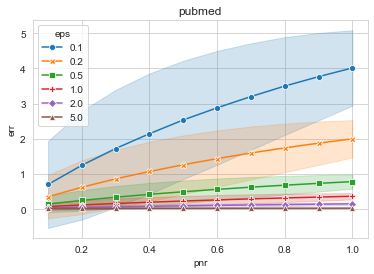

In [81]:
draw_error_results('pubmed', x='pnr', hue='eps', markers=True, style='eps', dashes=False)

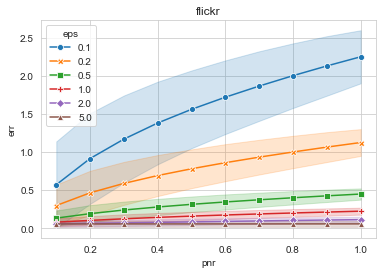

In [82]:
draw_error_results('flickr', x='pnr', hue='eps', markers=True, style='eps', dashes=False)

# Visualization

## Cora

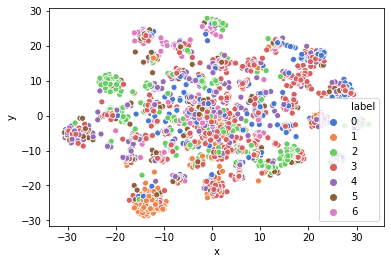

In [39]:
df = pd.read_pickle('results/visualize_cora_0.1.pkl')
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='muted')

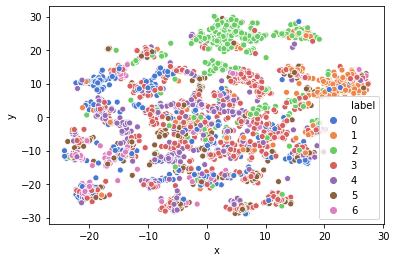

In [40]:
df = pd.read_pickle('results/visualize_cora_1.pkl')
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='muted')

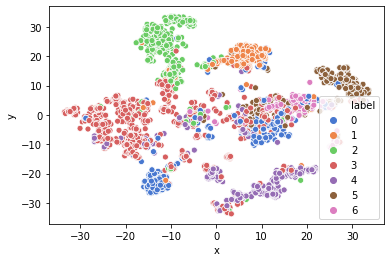

In [41]:
df = pd.read_pickle('results/visualize_cora_10.pkl')
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='muted')

## CiteSeer

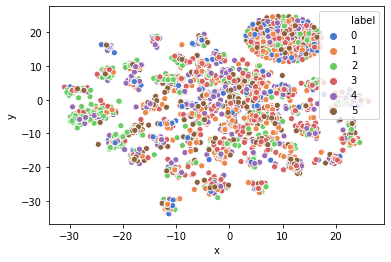

In [42]:
df = pd.read_pickle('results/visualize_citeseer_0.1.pkl')
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='muted')

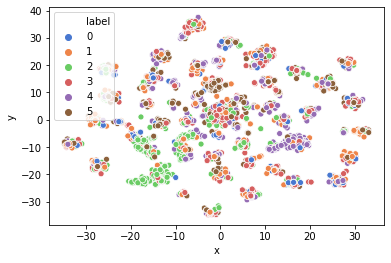

In [43]:
df = pd.read_pickle('results/visualize_citeseer_1.pkl')
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='muted')

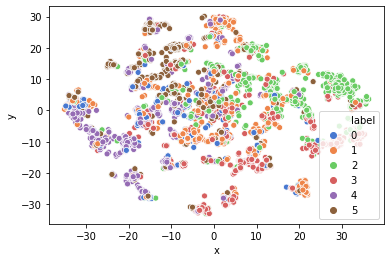

In [44]:
df = pd.read_pickle('results/visualize_citeseer_10.pkl')
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='muted')

## PubMed

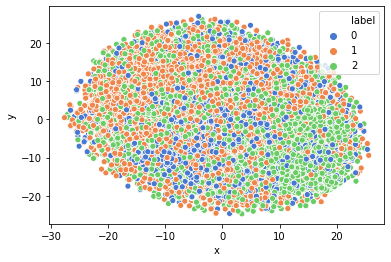

In [45]:
df = pd.read_pickle('results/visualize_pubmed_0.1.pkl')
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='muted')

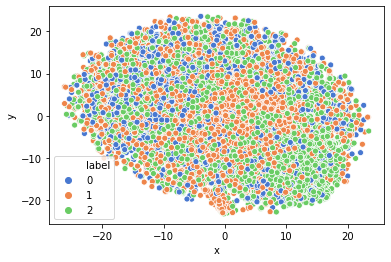

In [46]:
df = pd.read_pickle('results/visualize_pubmed_1.pkl')
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='muted')

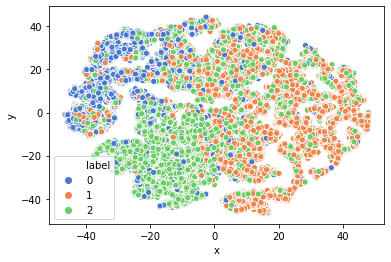

In [47]:
df = pd.read_pickle('results/visualize_pubmed_10.pkl')
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='muted')

In [10]:
df = pd.read_pickle('results/linkpred_cora_gcn_priv.pkl')

In [11]:
df

,method,pnr,pfr,eps,run,perf
0,gcn+priv,0.2,1.0,1.0,0,0.787150
1,gcn+priv,0.2,1.0,1.0,1,0.808659
2,gcn+priv,0.2,1.0,1.0,2,0.792515
3,gcn+priv,0.2,1.0,1.0,3,0.810279
4,gcn+priv,0.2,1.0,1.0,4,0.796476
...,...,...,...,...,...,...
2695,gcn+priv,1.0,1.0,9.0,95,0.823753
2696,gcn+priv,1.0,1.0,9.0,96,0.821992
2697,gcn+priv,1.0,1.0,9.0,97,0.823760
2698,gcn+priv,1.0,1.0,9.0,98,0.857656
